# Data Analysis & Preprocessing

In [ ]:
# Importing Libraries

from autots import AutoTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam 

import lightgbm as lgb


In [4]:
# Load Dataset
df = pd.read_csv('data/Foreign_Exchange_Rates.xls')
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,Unnamed: 24
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,NaN
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,NaN
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,NaN
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,NaN
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,NaN


In [5]:
print("Dataset Shape:", df.shape)
print(df.info())

Dataset Shape: (5217, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 5217 non-null   int64  
 1   Time Serie                                 5217 non-null   object 
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object 
 3   EURO AREA - EURO/US$                       5217 non-null   object 
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object 
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object 
 6   BRAZIL - REAL/US$                          5217 non-null   object 
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object 
 8   CHINA - YUAN/US$                           5217 non-null   object 
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object 
 10

## Cleaning data

In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 24'], axis=1, inplace=True)  # Dropping Unnamed:0 and Unnamed:24 Columns

# Convert timeseeries to datetime
df['Time Serie'] = pd.to_datetime(df['Time Serie'], format='%d-%m-%Y')

# Convert columns to numeric data
obj_cols = df.columns.to_list()
obj_cols.remove('Time Serie')

for col in obj_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')   # If a value is not a number NaN will be returned


# Removing any duplicates
df.drop_duplicates()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5217 non-null   datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64       
 2   EURO AREA - EURO/US$                       5019 non-null   float64       
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   float64       
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64       
 5   BRAZIL - REAL/US$                          5019 non-null   float64       
 6   CANADA - CANADIAN DOLLAR/US$               5019 non-null   float64       
 7   CHINA - YUAN/US$                           5020 non-null   float64       
 8   HONG KONG - HONG KONG DOLLAR/US$           5019 non-null   float64       
 9   INDIA - INDIAN RUPE

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [7]:
df.isnull().sum()

Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANKAN RUPEE/US$             198
SWITZERLAND - FRANC/

In [8]:
# Handling missing data using interpolation
df.interpolate(method='linear', inplace=True)
df.isnull().sum()


Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND - FRANC/US$                      0
TAIWAN - NEW 

In [9]:
df.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,...,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000
mean,2009-12-31 09:36:19.873490688,1.332292,0.844075,1.543670,0.640740,2.550725,1.230582,7.199296,7.782607,52.762012,...,1.480206,6.287267,106.593463,3.652043,7.078513,7.901951,119.202686,1.150110,31.766663,35.520137
min,2000-01-03 00:00:00,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,2004-12-31 00:00:00,1.115600,0.751200,1.323800,0.587900,1.946000,1.056000,6.475800,7.756350,45.270000,...,1.342900,5.594800,100.100000,3.293000,5.998800,6.853900,100.400000,0.966800,30.350000,31.780000
50%,2009-12-31 00:00:00,1.311500,0.815800,1.442600,0.636600,2.331000,1.237100,6.859700,7.780500,48.110000,...,1.408500,6.074000,109.040000,3.800000,6.787700,7.750900,112.350000,1.038600,31.730000,34.000000
75%,2014-12-31 00:00:00,1.430600,0.900300,1.590700,0.692500,3.132000,1.335700,8.276500,7.799800,62.470000,...,1.678700,6.715300,116.830000,3.800000,8.281200,8.747700,132.800000,1.268700,32.980000,39.420000
max,2019-12-31 00:00:00,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000
std,NaN,0.269807,0.126697,0.337136,0.082644,0.725450,0.182145,0.819867,0.027556,9.695960,...,0.188839,0.942473,13.222447,0.379208,1.227141,1.201904,25.412040,0.248851,1.670901,4.562262


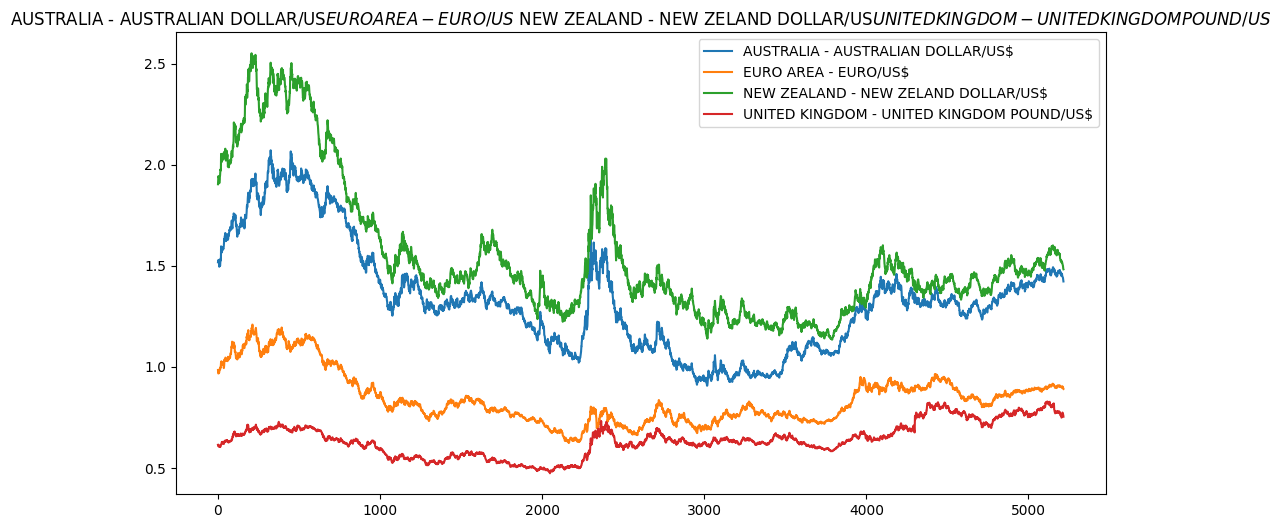

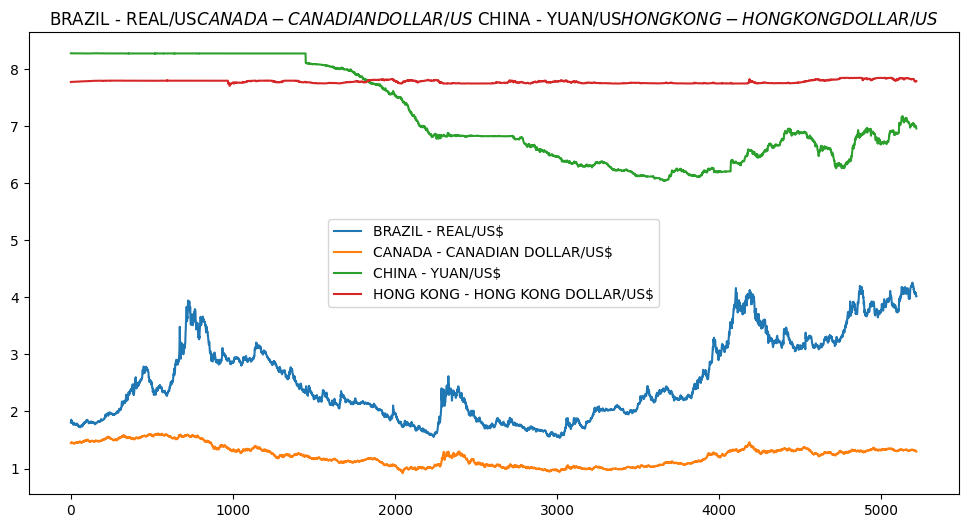

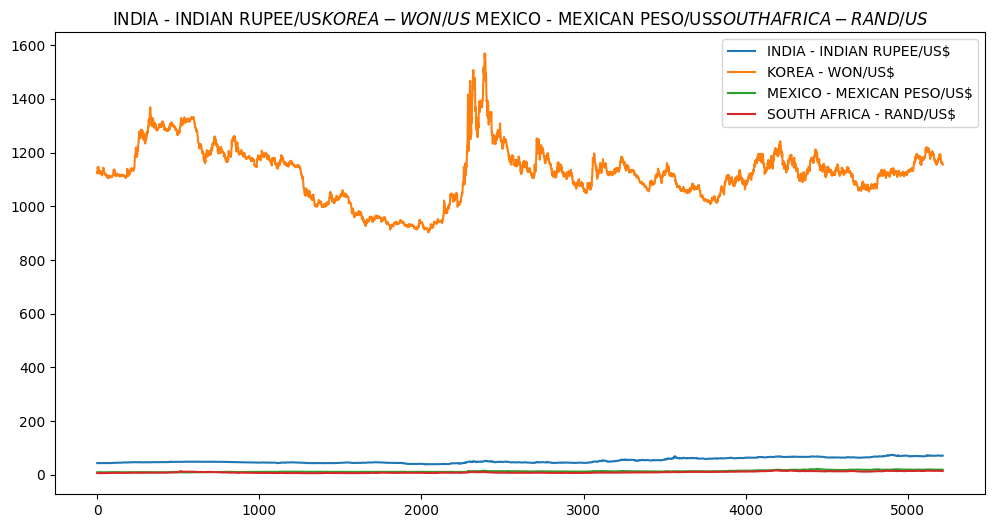

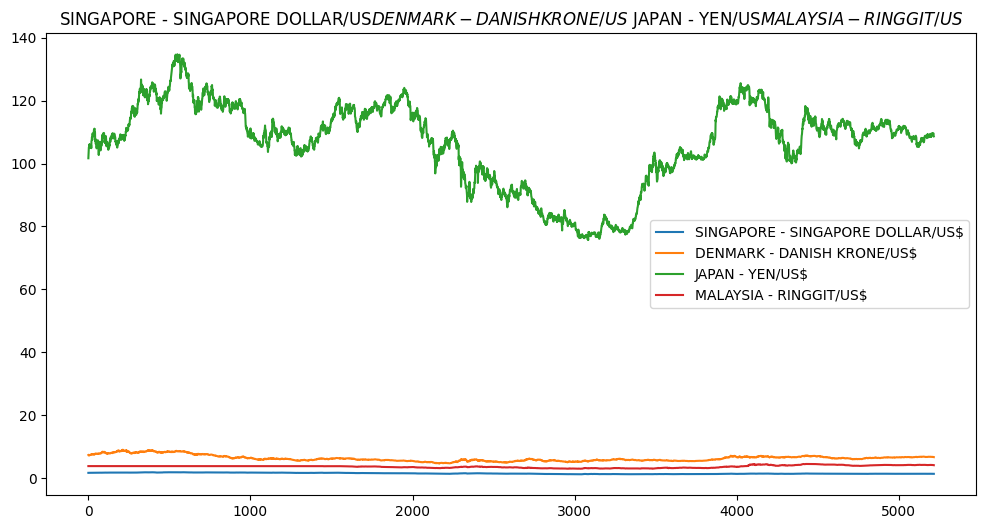

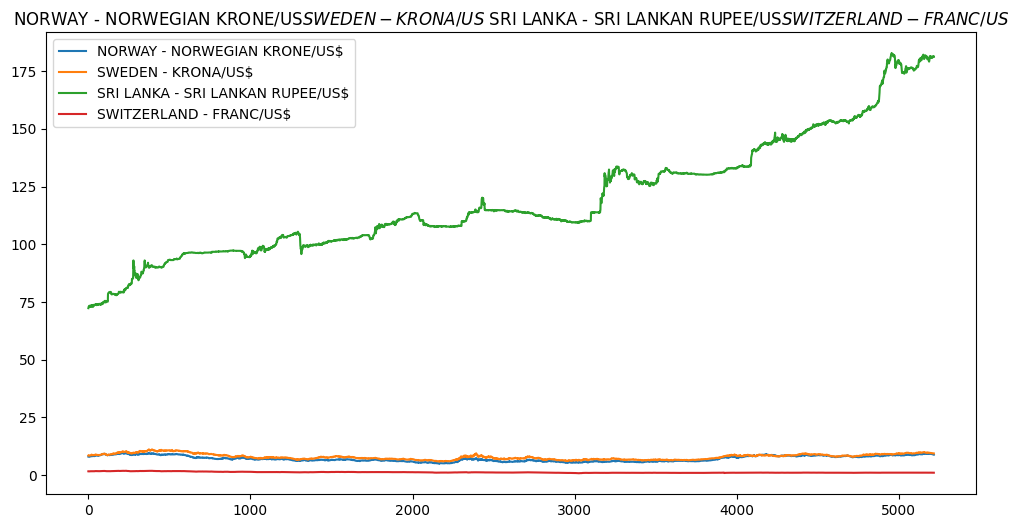

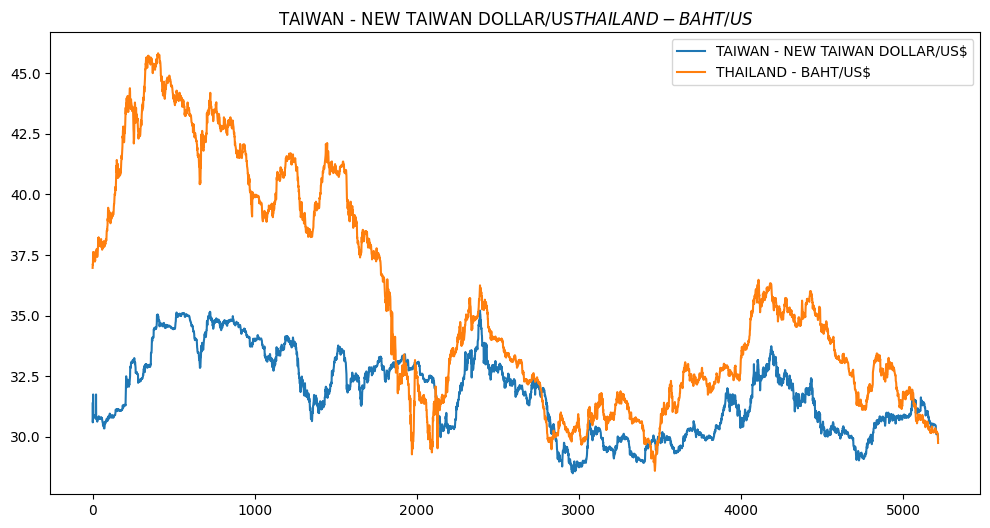

In [10]:
# Plotting Time-series
# Spliting currencies into groups of 4
col_grps = [df.columns[i:i+4] for i in range(1, len(df.columns), 4)]

for grp in col_grps:
  df[grp].plot(figsize=(12,6), title=" ".join(grp))
  plt.show()

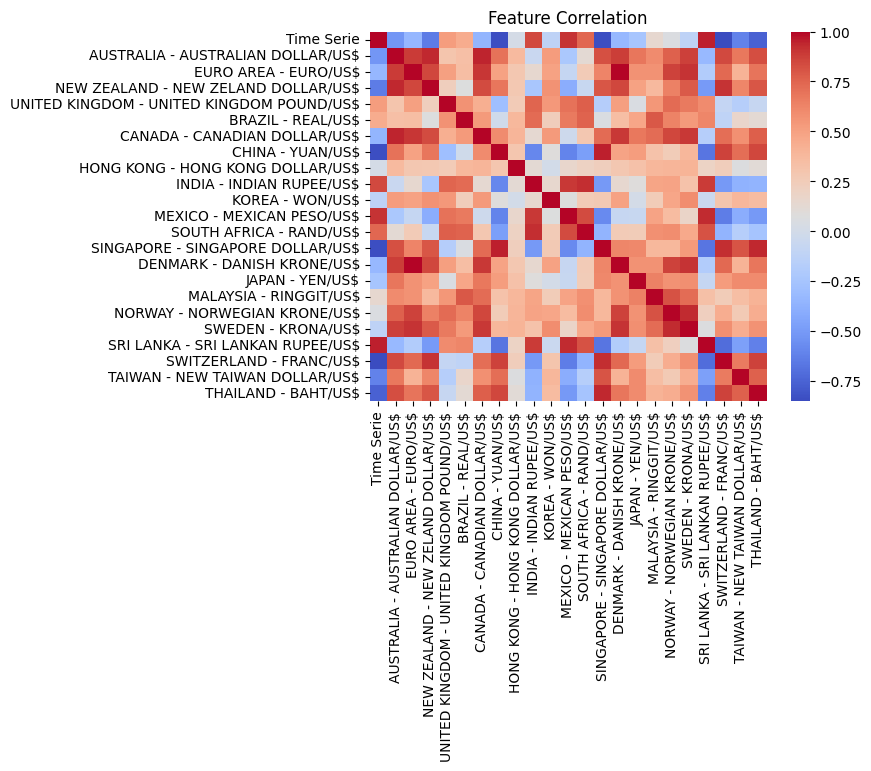

In [11]:
# Plotting the correlation of the variables
# Correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

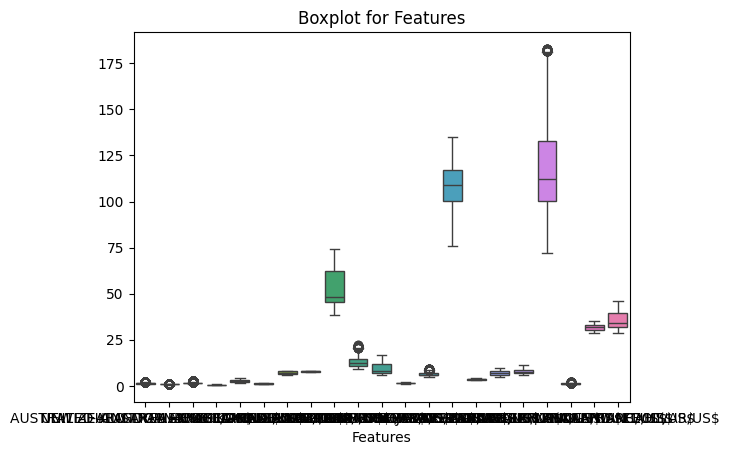

In [12]:
# Boxplot of features
sns.boxplot(data=df.drop('KOREA - WON/US$',axis=1))
plt.title('Boxplot for Features')
plt.xlabel('Features')
plt.show()

In [13]:
#selecting currency

options = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZEALAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

selected_option = 'SRILANKAN RUPEE' #select currency here to train model

In [14]:
df_selected = df[['Time Serie',options.get(selected_option)]]
df_selected.head()

,Time Serie,SRI LANKA - SRI LANKAN RUPEE/US$
0,2000-01-03,72.30
1,2000-01-04,72.65
2,2000-01-05,72.95
3,2000-01-06,72.95
4,2000-01-07,73.15


In [ ]:
# Function to compare the performance of each model 
metrics = []

def performance(name, y_pred, y_test):
    metrics.append({
        'Model ': name,
        'MAE': mean_absolute_error(y_test, y_pred), # Determine the MAE (Mean absolute error)
        'RMSE': mean_squared_error(y_test, y_pred), # Determine the RMSE (Root mean squared error)
        'MAPE': np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test)) * 100) # Determine the MAPE (Mean Absolute Percentage Error)

    })
    


In [ ]:
# Preparing features for modeling 

# Preparing data for tensorflow
def Sequential_Input_LSTM(df, input_sequence = 10):
    # df is the data being split into X,y
    # input_sequence is the number of days used to forecast the next day.
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)  

    return np.array(X), np.array(y)


# Splitting data for LightGBM model 
def lgb_sequence(df, n_input=10):
    X = []
    y = []
    for i in range(len(df) - n_input):
        X.append(df[i:i+n_input])
        y.append(df[i + n_input])
        
    return np.array(X), np.array(y) 


In [ ]:
def train_val_test_split(X,y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=22)

    return X_train, X_val, X_test, y_train, y_val, y_test
    

In [ ]:
# Model 1 : AutoTS

def Creating_AutoTS_model(df_selected, options[selected_option]):
    forecast=10 # no. of days for forecasting

    # Test-train split 
    # Excluding the points to be predicted
    df_train = df_selected.iloc[:-forecast] # Excluding the points to be predicted
    
    # Creating test data to align with prediction
    y_test = df_selected[[options[selected_option]]].iloc[-forecast:]
        
    # Creating AutoTS model
    model1 = AutoTS(forecast_length=int(forecast), frequency='infer', ensemble='simple', drop_data_older_than_periods=200)

    # Fitting model 
    model1 = model1.fit(df_train, date_col = 'Time Serie', value_col=options[selected_option], id_col=None)

    # Predictions
    #generating forecasts
    prediction = model1.predict()
    forecast = prediction.forecast

    # Aligning indices
    y_test.index = forecast.index 

    # Extracting currency values only 
    y_test = y_test[options[selected_option]].values
    y_pred = forecast[options[selected_option]].values


    return model1, y_test, y_pred

In [ ]:
# Model 2: LSTM using Tersorflow

def Creating_LSTM_model(n_input, X_train, X_val, X_test, y_train, y_val, y_test):
    
    model2 = Sequential()

    n_features =1 
    model2.add(InputLayer((n_input,n_features)))
    model2.add(LSTM(100, return_sequences = True))     
    model2.add(LSTM(100, return_sequences = True))
    model2.add(LSTM(50))
    model2.add(Dense(8, activation = 'relu'))
    model2.add(Dense(1, activation = 'linear'))

    model2.summary()

    early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

    model2.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])
    early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

    model2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, callbacks = [early_stop])

    # Prediction 
    y_pred = model2.predict(X_test).flatten()

    return model2, y_test, y_pred


In [ ]:
# Model 3 
def Creating_LightGBM_model(X_train, X_val, X_test, y_train, y_val, y_test):
    # Data preperations 
    

    # Creating LightGBM datasets
    lgb_train_data = lgb.Dataset(X_train, label=y_train)
    lgb_val_data = lgb.Dataset(X_val, label=y_val, reference=lgb_train_data)

    # Define hyperparameters
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1
    }
    # Train the LightGBM model
    num_round = 500
    model3 = lgb.train(params, lgb_train_data, num_round, valid_sets=[lgb_val_data])

    # Prediction 
    y_pred = model3.predict(X_test)

    return model3, y_test, y_pred
        

In [1]:
def model_selection_per_currency(df_selected, options, selected_option):

    autots_model, y_test_autots, y_pred_autots = Creating_AutoTS_model(df_selected, options[selected_option])
    
    X, y = Sequential_Input_LSTM(df_selected.iloc[:,1])
    X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y)
    n_input = 10
    lstm_model, y_test_lstm, y_pred_lstm = Creating_LSTM_model(n_input, X_train, X_val, X_test, y_train, y_val, y_test)

    X1,y1 = lgb_sequence(df_selected.iloc[:,1].values) 
    X1 = X1.reshape(X1.shape[0], -1)  
    X1_train, X1_val, X1_test, y1_train, y1_val, y1_test = train_val_test_split(X1,y1)
    lgb_model, y_test_lgb, y_pred_lgb = Creating_LightGBM_model(X1_train, X1_val, X1_test, y1_train, y1_val, y1_test)

    return 
